# Data exploration and data visualisation of medical claims data

_By Mark J. Hantic_

As a follow-up to the 'Utilisation Report - Automation Module,' this module focuses on visualisation of the data exploration results, crucial to creating a comprehensive dashboard.

---

### A. Importing libraries and exploring the data
#### 1. First, we have to install the following libraries in order to read our excel file:
- <code>Pandas</code> is a software library for the Python programming language that provides tools for data manipulation and analysis, including functions for reading and writing data in various formats, filtering and aggregating data, and plotting and visualising data.

- <code>Matplotlib</code> is a popular data visualization library for Python. It provides a wide range of tools for creating static, animated, and interactive visualizations in Python.

- <code>Seaborn</code> is a Python data visualization library that is built on top of Matplotlib. It provides a higher-level interface for creating more complex and aesthetically pleasing visualizations than Matplotlib, while still retaining the low-level control of Matplotlib.

In [1]:
# pip install pandas matplotlib seaborn

#### 2. Import the necessary libraries and read the Excel file into a DataFrame:

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import locale
import math
import textwrap
from datetime import datetime

In [3]:
import time
start_time = time.time()

#### 3. Perform preliminary data exploration and data cleaning to prepare for analysis.

**The following steps are taken to explore and clean the data:**

- Read data from an Excel file called 'krusty_krab.xlsx' using Pandas' <code>pd.read_excel()</code> function to create a DataFrame.
- Print the first five rows of the DataFrame using <code>df.head()</code> to quickly check the data.
- Print the shape of the DataFrame using <code>df.shape</code> to see how many rows and columns the DataFrame contains.
- Drop unnecessary columns from the DataFrame using <code>df.drop(columns=[])</code> to remove any columns that are not needed for analysis.
- Print the first five rows of the DataFrame again using <code>df.head()</code> to confirm that the unnecessary columns have been removed.
- Define start and end dates as datetime objects and format them as strings using <code>strftime()</code>.
- Create a new 'Date' column in the DataFrame using <code>where()</code> to choose between two different date columns based on the value of another column.
- Create a new 'MEMBER TYPE' column in the DataFrame using conditional logic on the 'DEPENDENTS' column to categorize members as either 'primary' or 'dependent'.
- Create a new 'Patient ID' column in the DataFrame using <code>where()</code> to choose between two different columns based on the value of another column.
- Create a new 'Transaction Type' column in the DataFrame using <code>where()</code> to choose between two different values based on the value of another column.
- Select a subset of the data within a specific date range using <code>df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]</code> to focus analysis on a specific period.
- Remove any rows where the 'CLAIM STATUS' column is 'denied' using <code>df = df[df['CLAIM STATUS'] != 'denied']</code>
- Remove any rows with missing values in the 'CLAIM AMOUNT' column using <code>df.dropna(subset=['CLAIM AMOUNT'])</code> to ensure accurate calculations for analysis.

In [4]:
df = pd.read_excel('krusty_krab.xlsx')
df.head()
df.shape

(1672, 30)

In [5]:

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [6]:
# Drop unnecessary columns
df = df.drop(columns=['APPROVE DATE', 'DATE DENIED','PROCESSED DATE','PAYORLINK NO.',
                      'TAX RATE','TAX AMOUNT','PAYABLE AMOUNT','GGD REFERENCE NO',
                     'MEMBER EXCESS','DATE PAID','CHECK NUMBER','DATE OF POSTING',
                     'APPROVER','PROCESSOR','PLAN TYPE'])
df.head()

,POLICY,CLIENT NAME,PLAN CODE,DEPENDENTS,CERT NO.,ILLNESS DATE,RECEIVED DATE,PAYEE NAME,CLAIM NO,CLAIM TYPE,CLAIM AMOUNT,CLAIM STATUS,ILLNESS,REMARKS,PAYEE TYPE
0,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,252,2022-05-15,2022-05-25,CHINESE GENERAL HOSPITAL INC.,624924,INPATIENT,38042.76,PAID,"Amenorrhoea, unspecified",NaN,HOSPITAL
1,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,444,2022-03-12,2022-03-22,HEALTHWAY MEDICAL CLINIC-ALABANG TOWN CENTER,613386,OUTPATIENT,3200.00,PAID,"Otitis externa, unspecified",NaN,HOSPITAL
2,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,801,2022-04-01,2022-04-13,MEDICAL CLINIC-RCBC,614535,OUTPATIENT,550.00,PAID,"Endometriosis, unspecified",network availment,HOSPITAL
3,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,388,234,2022-08-10,2022-09-01,"BACOOR DOCTORS MEDICAL CENTER INC.,",643238,OUTPATIENT,4749.00,PAID,Hypertensive heart disease without (congestive...,NaN,HOSPITAL
4,2021213-00,THE KRUSTY KRAB (MEDICAL),HSEB,NaN,705,2022-06-02,2022-07-04,HEALTHWEALTH MEDICAL SPECIALIST,630657,OUTPATIENT,725.00,PAID,"Urinary tract infection, site not specified",NaN,HOSPITAL


In [7]:
start_date = datetime(2021, 11, 1)
end_date = datetime(2022, 10, 31)

start_date_str = start_date.strftime("%B %d, %Y")
end_date_str = end_date.strftime("%B %d, %Y")

In [8]:
df['Date'] = df['RECEIVED DATE'].where(df['PAYEE TYPE'] == 'REIMBURSEMENT', df['ILLNESS DATE'])
df['MEMBER TYPE'] = ['Principal' if pd.isna(dependent) else 'Dependent' for dependent in df['DEPENDENTS']]
df['Patient ID'] = df['CERT NO.'].where(df['MEMBER TYPE'] == 'Principal', df['DEPENDENTS'])
df['Transaction Type'] = df['PAYEE TYPE'].where(df['PAYEE TYPE'] == 'REIMBURSEMENT', other='NETWORK')

In [9]:
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df = df[df['CLAIM STATUS'] != 'denied']
df = df.dropna(subset=['CLAIM AMOUNT'])

In [10]:
df.shape

(1628, 19)

### B. Extracting company and policy Information, and capturing extraction date

**1. To extract the company name and date, the following steps are performed:**

- Retrieve the name of the company and the policy number from the 'CLIENT NAME' and 'POLICY' columns of a Pandas DataFrame called <code>df</code> using <code>iloc</code>. This allows you to extract specific values from the DataFrame using their position in the DataFrame.
- Get the current date using the <code>datetime.now()</code> function.
- Format the current date as a long date string using <code>strftime()</code>. This creates a human-readable format that can be easily understood and interpreted.
- Concatenate the long date string with the "Date extracted: " string using an f-string to create a new string variable called <code>date_extracted</code>. This variable indicates the date the data was extracted and can be useful for adding metadata or context to data extractions or reports. By including the date extracted, you can ensure that anyone who uses the data has a clear understanding of when it was last updated and can assess its relevance to their needs.

In [11]:
company_name = df.iloc[0]['CLIENT NAME']
policy_num = df.iloc[0]['POLICY']

# Get the current date
now = datetime.now()

# Format the date as a long date
date_formatted = now.strftime('%B %d, %Y')

# Concatenate the date with the "Date extracted: " string
date_extracted = f"Date extracted: {date_formatted}"

date_extracted

'Date extracted: June 11, 2023'

***Result:***

In [12]:
print(company_name)
print(policy_num)
print(f"{start_date_str} to {end_date_str}")
print(date_extracted)

THE KRUSTY KRAB (MEDICAL)
2021213-00
November 01, 2021 to October 31, 2022
Date extracted: June 11, 2023


### C. Performing data summarisation and creating visualisations (with Pandas DataFrame)

**1. Aggregate amounts by type and creating a summary dataframe**
   - To generate a summary of numerical data, it is necessary to group the data by a specified column using <code>groupby()</code> and compute the sum of a specified numerical column for each group using <code>sum()</code>. After calculating the total sum of all the numerical values, concatenate the result with a new Pandas Series that includes the total sum under a specified label. This will produce a new summary DataFrame with two columns: the category column and the numerical sum column, and one row for each unique category plus one row for the total. This process of grouping and summarizing the data can be useful in providing an overview of the data and identifying trends or patterns that might not be immediately visible in the raw data.

In [13]:
# Summary DF for the summary sheet
cost_sum_df = df.groupby('CLAIM TYPE')['CLAIM AMOUNT'].sum()
total = cost_sum_df.sum()
summary_df = pd.concat([cost_sum_df, pd.Series(total, index=['Total'])])

print(summary_df)

A.P.E.        1073894.00
INPATIENT     4351647.42
OUTPATIENT    1799098.45
Total         7224639.87
dtype: float64


In [14]:
# More ellaborate summary by claim type
cost_df = df.groupby('CLAIM TYPE')['CLAIM AMOUNT'].agg([('Total Cost', 'sum')])
clm_df = df.groupby('CLAIM TYPE')['CLAIM NO'].agg([('Number of claims', 'nunique')])
mem_df = df.groupby('CLAIM TYPE')['Patient ID'].nunique().to_frame('Number of members')

# Concatenate the dataframes
new_sum_df = pd.concat([cost_df, clm_df, mem_df], axis=1)

new_sum_df = new_sum_df.assign(Average_Claim_Amount = new_sum_df['Total Cost'] / new_sum_df['Number of claims'])

# Add a new column for the claims-to-members ratio
new_sum_df['Claims-to-Members Ratio'] = new_sum_df.apply(
    lambda row: f"1:{math.ceil(row['Number of claims'] / row['Number of members'])}"
    if row['Number of members'] > 0 or row['Number of claims'] == 1 else "", axis=1)


print(new_sum_df)


            Total Cost  Number of claims  Number of members  \
CLAIM TYPE                                                    
A.P.E.      1073894.00                47                  0   
INPATIENT   4351647.42               234                183   
OUTPATIENT  1799098.45              1302                469   

            Average_Claim_Amount Claims-to-Members Ratio  
CLAIM TYPE                                                
A.P.E.              22848.808511                          
INPATIENT           18596.783846                     1:2  
OUTPATIENT           1381.796045                     1:3  


In [15]:
# Claims summary by member type
mem_cost = df.groupby('MEMBER TYPE')['CLAIM AMOUNT'].agg([('Total Cost', 'sum')])
memtype = df.groupby('MEMBER TYPE')['CLAIM NO'].agg([('Number of claims', 'nunique')])
mem_uniq = df.groupby('MEMBER TYPE')['Patient ID'].nunique().to_frame('Number of members')

memtype_df = pd.concat([mem_cost, memtype, mem_uniq], axis=1)
memtype_df = memtype_df.assign(Average_Claim_Amount = memtype_df['Total Cost'] / memtype_df['Number of claims'])
memtype_df['Claims-to-Members Ratio'] = memtype_df.apply(
    lambda row: f"1:{math.ceil(row['Number of claims'] / row['Number of members'])}"
    if row['Number of members'] > 0 or row['Number of claims'] == 1 else "", axis=1)


print(memtype_df)

             Total Cost  Number of claims  Number of members  \
MEMBER TYPE                                                    
Dependent    3069316.85               713                289   
Principal    4155323.02               870                311   

             Average_Claim_Amount Claims-to-Members Ratio  
MEMBER TYPE                                                
Dependent             4304.792216                     1:3  
Principal             4776.233356                     1:3  


---

**2. Defining functions that generate the charts**
   - To summarise the distribution and relative magnitudes of different categories, prepare the data by mapping category labels to colours using a specified colour dictionary. Once the data is formatted, use <code>matplotlib</code> to create a chart that presents the data in an intuitive and engaging way, which can be used in creating a dashboard. To ensure the chart is easily readable, create a legend that displays the category labels and their corresponding colors. Finally, apply a specific <code>Seaborn</code> plot style to the chart to enhance its appearance and impact.

   - Define a Python function called <code>generate_chart_</code> that generates a semi circle donut chart. It formats the data, assigns colours to each label, creates the pie chart with a white circle in the centre for a donut chart effect, and adds a legend and table for additional information:

In [16]:
def generate_chart_amount(data, title, label_colors=None):
    # Make a copy of the label_colors dictionary
    label_colors = label_colors.copy() if label_colors else {
        'INPATIENT': '#003391',
        'OUTPATIENT': '#ECAD00',
        'PRESCRIBED MEDICINES': '#FFC107',
        'A.P.E.': '#c4c9d0',
        '': '#FFFFFF'
    }

    # Set the style
    sns.set_style("white")

    # Prepare the data
    label = data.index.tolist()
    val = data['Total Cost'].tolist()

    # Append data and assign color
    label.append("")
    val.append(sum(val))  # 50% blank

    # Create dictionary to map labels to colors
    default_colors = ['#003391', '#ECAD00']
    colors = [label_colors.get(l, default_colors[i % len(default_colors)]) for i, l in enumerate(label)]

    # Format the values with a suffix and create a new label
    formatted_values = []
    for i, value in enumerate(val):
        if value >= 1e3:
            formatted_value = '{:,.0f}'.format(value)
        else:
            formatted_value = '{:.0f}'.format(value)    
        formatted_values.append(formatted_value)

    formatted_values[-1] = ''  # Replace last element with an empty string

    # Remove the last element from the label list
    label.pop()

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(6, 4.55), dpi=100)

    # Create the pie chart
    ax.pie(val, labels=formatted_values, colors=colors)
    ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

    ax.set_title(title)

    # Add a legend
    ax.legend(label, frameon=False, loc='lower center', bbox_to_anchor=(0.5, 0.4), ncol=4, fontsize=10)

    # Create a table to show additional data
    table_data = data[['Average_Claim_Amount']].reset_index().values
    table_data[:, 1] = [f"{x:,.2f}" for x in table_data[:, 1]]
    table_columns = ['Type', 'Avg. Cost']
    table = ax.table(
        cellText=table_data, 
        colLabels=table_columns, 
        loc='lower center', 
        bbox=[0,0.2,1,0.2], 
        cellLoc='center'
    )

    # Set the table font size
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    table.set_zorder(1)

    # Wrap text within cells
    for cell in table._cells:
        cell_obj = table._cells[cell]
        text = cell_obj._text.get_text()
        wrapped_text = '\n'.join(textwrap.wrap(text, 15))
        cell_obj._text.set_text(wrapped_text)

    plt.show()

In [17]:
def generate_chart_count(data, title, label_colors=None):

    sns.set_style("white")
    label = data.index.tolist()
    val = data['Number of claims'].tolist()


    label.append("")
    val.append(sum(val))

    if label_colors is None:
        label_colors = {
            'INPATIENT': '#003391',
            'OUTPATIENT': '#ECAD00',
            'PRESCRIBED MEDICINES': '#FFC107',
            'A.P.E.': '#c4c9d0',
            '': '#FFFFFF'
        }

    default_colors = ['#003391', '#ECAD00']
    colors = [label_colors.get(l, default_colors[i % len(default_colors)]) for i, l in enumerate(label)]

    formatted_values = []
    for i, value in enumerate(val):
        if value >= 1e3:
            formatted_value = '{:,.0f}'.format(value)
        else:
            formatted_value = '{:.0f}'.format(value)
        formatted_values.append(formatted_value)

    formatted_values[-1] = '' 
    label.pop()

    fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

    ax.pie(val, labels=formatted_values, colors=colors)
    ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

    ax.set_title(title)
    ax.legend(label, frameon=False, loc='lower center', bbox_to_anchor=(0.5, 0.4), ncol=4, fontsize=10)
    table_data = data[['Number of members','Claims-to-Members Ratio']].reset_index().values
    table_columns = ['Type', 'Member Count', 'Ratio']
    table = ax.table(
        cellText=table_data, 
        colLabels=table_columns, 
        loc='lower center', 
        bbox=[0,0.2,1,0.2], 
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    table.set_zorder(1)

    for cell in table._cells:
        cell_obj = table._cells[cell]
        text = cell_obj._text.get_text()
        wrapped_text = '\n'.join(textwrap.wrap(text, 15))
        cell_obj._text.set_text(wrapped_text)

    plt.show()


- Now the following cells contain codes that combine three different data sets into one and calculate the average value for each category. It also calculates a claims-to-members ratio and generates a chart that shows the distribution of values across the different categories, along with a table that provides more detailed information about each category.

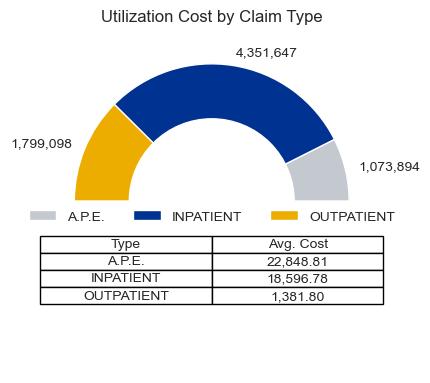

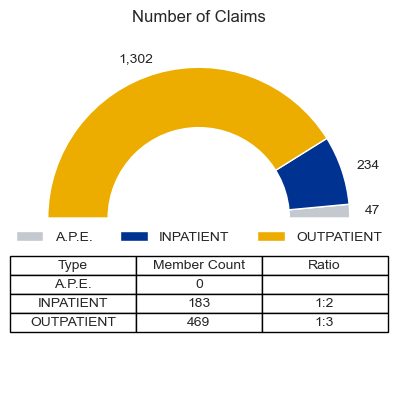

In [18]:
# Concatenate the dataframes
new_sum_df = pd.concat([cost_df, clm_df, mem_df], axis=1)

new_sum_df = new_sum_df.assign(Average_Claim_Amount = new_sum_df['Total Cost'] / new_sum_df['Number of claims'])

# Add a new column for the claims-to-members ratio
new_sum_df['Claims-to-Members Ratio'] = new_sum_df.apply(
    lambda row: f"1:{math.ceil(row['Number of claims'] / row['Number of members'])}"
    if row['Number of members'] > 0 or row['Number of claims'] == 1 else "", axis=1)

# Generate the chart
generate_chart_amount(new_sum_df, "Utilization Cost by Claim Type")
generate_chart_count(new_sum_df, "Number of Claims")

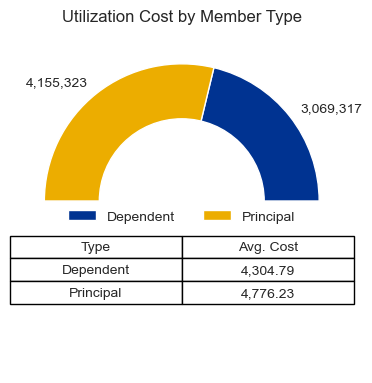

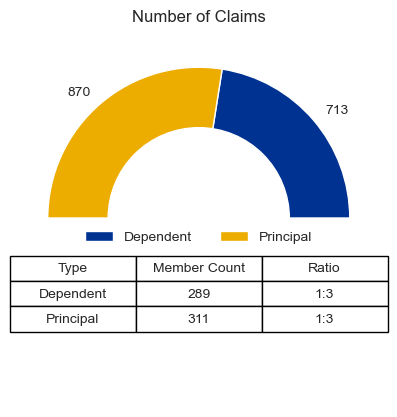

In [19]:
# Claims summary by member type
mem_cost = df.groupby('MEMBER TYPE')['CLAIM AMOUNT'].agg([('Total Cost', 'sum')])
memtype = df.groupby('MEMBER TYPE')['CLAIM NO'].agg([('Number of claims', 'nunique')])
mem_uniq = df.groupby('MEMBER TYPE')['Patient ID'].nunique().to_frame('Number of members')

memtype_df = pd.concat([mem_cost, memtype, mem_uniq], axis=1)
memtype_df = memtype_df.assign(Average_Claim_Amount = memtype_df['Total Cost'] / memtype_df['Number of claims'])
memtype_df['Claims-to-Members Ratio'] = memtype_df.apply(
    lambda row: f"1:{math.ceil(row['Number of claims'] / row['Number of members'])}"
    if row['Number of members'] > 0 or row['Number of claims'] == 1 else "", axis=1)

# Generate the chart
generate_chart_amount(memtype_df, "Utilization Cost by Member Type")
generate_chart_count(memtype_df, "Number of Claims")

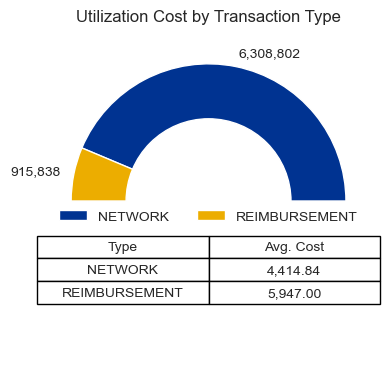

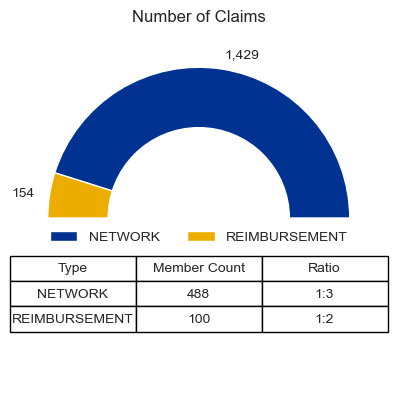

In [20]:
# Claims summary by transaction type
transact_cost = df.groupby('Transaction Type')['CLAIM AMOUNT'].agg([('Total Cost', 'sum')])
transacttype = df.groupby('Transaction Type')['CLAIM NO'].agg([('Number of claims', 'nunique')])
tran_mem_uniq = df.groupby('Transaction Type')['Patient ID'].nunique().to_frame('Number of members')

transtype_df = pd.concat([transact_cost, transacttype, tran_mem_uniq], axis=1)
transtype_df = transtype_df.assign(Average_Claim_Amount = transtype_df['Total Cost'] / transtype_df['Number of claims'])
transtype_df['Claims-to-Members Ratio'] = transtype_df.apply(
    lambda row: f"1:{math.ceil(row['Number of claims'] / row['Number of members'])}"
    if row['Number of members'] > 0 or row['Number of claims'] == 1 else "", axis=1)

# Generate the chart
generate_chart_amount(transtype_df, "Utilization Cost by Transaction Type")
generate_chart_count(transtype_df, "Number of Claims")

***Summarise Monthly Trends in a Pandas DataFrame***

To summarise monthly trends in a Pandas DataFrame, we will convert a date column to a datetime format using pd.to_datetime(). We will then group the data by month and calculate the sum of a specified numerical column using groupby() and sum(), creating a new DataFrame with columns for the date, the sum of the numerical column, and an abbreviated month name. The DataFrame will be sorted by the date column to ensure correct month order. Next, we will group the data by month again and calculate the count of unique values in a specified column using groupby() and nunique(), creating a second DataFrame with columns for the date, the count of unique values, and an abbreviated month name. This DataFrame will also be sorted by the date column. Finally, we will merge the two DataFrames into a single DataFrame that includes the monthly sum and count data, as well as the abbreviated month names. This process of summarising and aggregating the data by month can help to identify seasonal patterns or trends that may not be immediately visible in the raw data.

In [21]:
# convert the date column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# group the data by month and sum the CLAIM AMOUNT column
monthly_cost = df.groupby(pd.Grouper(key='Date', freq='M'))['CLAIM AMOUNT'].sum()

# create a new DataFrame for the monthly cost data
monthly_cost_df = monthly_cost.to_frame().reset_index()

# create a new column for the abbreviated month names
monthly_cost_df['Month'] = monthly_cost_df['Date'].dt.strftime('%b')

# sort the DataFrame by the date column to ensure correct month order
monthly_cost_df = monthly_cost_df.sort_values('Date')

# group the data by month and count the unique CLAIM NUMBER
monthly_count = df.groupby(pd.Grouper(key='Date', freq='M'))['CLAIM NO'].nunique()

# create a new DataFrame for the monthly count data
monthly_count_df = monthly_count.to_frame().reset_index()

# create a new column for the abbreviated month names
monthly_count_df['Month'] = monthly_count_df['Date'].dt.strftime('%b')

# sort the DataFrame by the date column to ensure correct month order
monthly_count_df = monthly_count_df.sort_values('Date')

# merge the monthly cost and monthly count DataFrames
monthly_data = pd.merge(monthly_cost_df, monthly_count_df, on=['Date', 'Month'])

monthly_data

,Date,CLAIM AMOUNT,Month,CLAIM NO
0,2021-11-30,187899.33,Nov,32
1,2021-12-31,972495.71,Dec,65
2,2022-01-31,527260.99,Jan,107
3,2022-02-28,434365.97,Feb,95
4,2022-03-31,795228.73,Mar,178
5,2022-04-30,595926.72,Apr,146
6,2022-05-31,902249.06,May,149
7,2022-06-30,476358.59,Jun,161
8,2022-07-31,421040.55,Jul,165
9,2022-08-31,919567.13,Aug,211


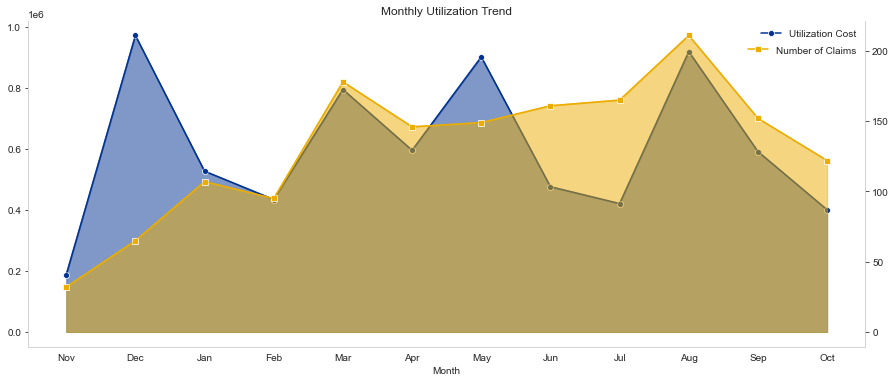

In [22]:
# Create the line chart
sns.set_style("white", {"grid": False,"axes.edgecolor": "#D3D3D3"})
fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(x="Month", y="CLAIM AMOUNT", data=monthly_data, ax=ax1, color='#003391', label='Utilization Cost', marker='o')
ax2 = ax1.twinx()
sns.lineplot(x="Month", y="CLAIM NO", data=monthly_data, ax=ax2, color='#ECAD00', label='Number of Claims', marker='s')

# Fill area under Utilization Cost line with gradient color
sns.lineplot(x="Month", y="CLAIM AMOUNT", data=monthly_data, ax=ax1, color='#003391', alpha=0.5)
ax1.fill_between(monthly_data['Month'], monthly_data['CLAIM AMOUNT'], color='#003391', alpha=0.5)

# Fill area under Number of Claims line with gradient color
sns.lineplot(x="Month", y="CLAIM NO", data=monthly_data, ax=ax2, color='#ECAD00', alpha=0.5)
ax2.fill_between(monthly_data['Month'], monthly_data['CLAIM NO'], color='#ECAD00', alpha=0.5)

# Set the labels and titles
ax1.set_ylabel('')
ax2.set_ylabel('')
plt.title('Monthly Utilization Trend')

# Reset the legend for Utilization Cost
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right',frameon=False,facecolor='white')

# Add legend for Number of Claims and stack in lower right
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.95),frameon=False,facecolor='white')

# Remove the top border
sns.despine(top=True, left=False, right=False)

plt.show()


___

***Adding Tables to Charts***

The addition of tables beneath the chart provides a more detailed and organized view of the data, allowing for easier comparison and analysis. This can improve overall understanding and helps the making of more informed decisions based on the presented data. Additionally, it's important to note that different audiences may have varying preferences for how data is presented. While some may find charts more accessible and intuitive, others may understand numerical data and tables more easily. By including both charts and tables, the presentation can cater to the needs of a wider range of users, ensuring that everyone can understand and analyse the data in a way that makes sense to them.

***Why showing the cost per categories is important for insurance providers?***

Cost analysis by claim type, member type, and transaction type is a critical component of healthcare management and insurance planning. These analyses provide insights to the sources of costs, and reveal opportunities for cost savings or preventive measures. By understanding where costs are coming from, and which factors are driving them, insurance providers can make informed decisions about how to manage costs effectively, while still providing high-quality coverage to clients. This information can be used to identify cost drivers, optimize insurance plans, and prioritize investments in preventive care and other cost-saving initiatives.

---
- Next is we define a function called <code>plot_top_n_</code> that generates a horizontal bar chart displaying the top 10 illnesses/providers based on their claim amounts.

- For top illnesses:

In [23]:
def plot_top_n_illness(df, n, x_label, y_label, title):
    sns.set_style("whitegrid")
    sns.set(rc={"figure.figsize":(14,9.21)})
    ax = sns.barplot(x='CLAIM AMOUNT', y='Illness', data=df[:n], color='#ECAD00')

    # Set the labels and title
    ax.set(xlabel=x_label, ylabel=y_label)
    ax.set_title(title, fontsize=16)

    # Add annotations to the bars, formatted in thousands or millions
    max_value = df['CLAIM AMOUNT'].max() * 1.5  # add a 50% margin
    for p, r in zip(ax.patches, df.iterrows()):
        value = p.get_width()
        ratio = r[1]['Claims-to-Members Ratio']
        avg = r[1]['Average_Claim_Amount']
        if value >= 1_000_000:
            text = f'{value / 1_000_000:.1f}M, {ratio}, {avg / 1_000:.1f}k'
        elif value >= 1_000:
            text = f'{value / 1_000:.1f}K, {ratio}, {avg / 1_000:.1f}k'
        else:
            text = f'{value:.2f}, {ratio}, {avg:.2f}'
        ax.annotate(text, 
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(5, 0), 
                    textcoords='offset points',
                    fontsize=13)

    # Set the x-axis limit to accommodate the annotations
    ax.set_xlim(right=max_value)

    def format_tick_label(value, pos):
        if value >= 1_000_000:
            return f'{value / 1_000_000:.0f}M'
        elif value >= 1_000:
            return f'{value / 1_000:.0f}K'
        else:
            return f'{value:.2f}'

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_tick_label))

    ax.set_facecolor('white')

    plt.show()

In [24]:
# Select only inpatient claims and group by illness
inpatient_data = df[df['CLAIM TYPE'] == 'INPATIENT']
grouped_by_illness = inpatient_data.groupby('ILLNESS').agg({'CLAIM AMOUNT': 'sum', 'CLAIM NO': 'nunique', 'Patient ID': 'nunique'})

# Change column headings
grouped_by_illness.columns = ['CLAIM AMOUNT', 'Number of Claims', 'Number of Members']

# Add a new column for the claims-to-members ratio
grouped_by_illness['Claims-to-Members Ratio'] = grouped_by_illness.apply(
    lambda row: f"1:{math.ceil(row['Number of Claims'] / row['Number of Members'])}"
    if row['Number of Members'] > 0 or row['Number of Claims'] == 1 else "N/A", axis=1)

# Add a new column for the average claim amount
grouped_by_illness = grouped_by_illness.assign(Average_Claim_Amount = grouped_by_illness['CLAIM AMOUNT'] / grouped_by_illness['Number of Claims'])

# Sort by claim amount and get top 10
top_10_inpatient_illness = grouped_by_illness.sort_values('CLAIM AMOUNT', ascending=False).head(10)

top_10_inpatient_illness = top_10_inpatient_illness.reset_index().rename(columns={'ILLNESS': 'Illness'})

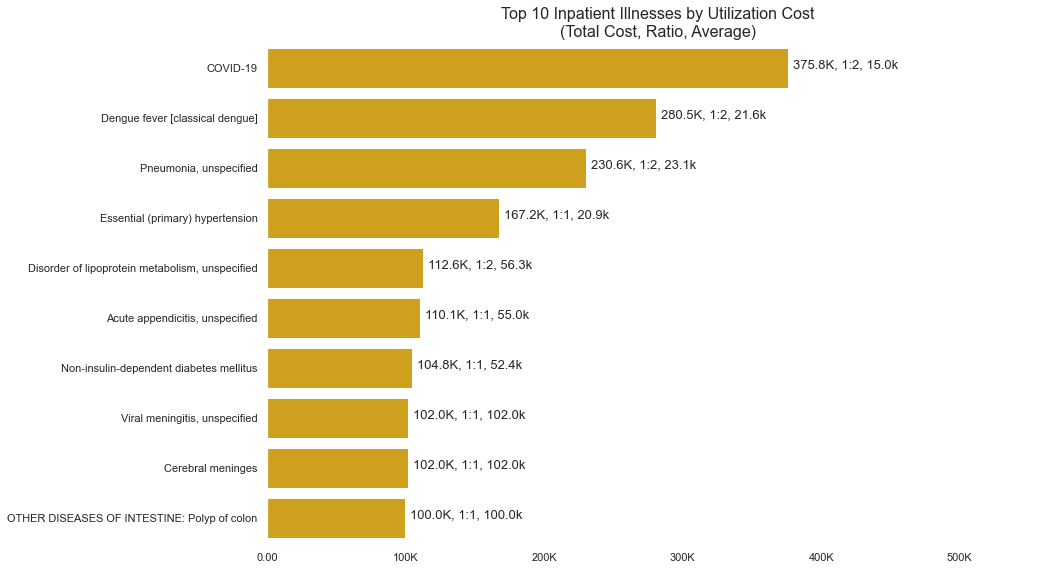

In [25]:
plot_top_n_illness(top_10_inpatient_illness, 10, 
                   '', '', 
                   'Top 10 Inpatient Illnesses by Utilization Cost\n(Total Cost, Ratio, Average)')

In [26]:
outpatient_data = df[df['CLAIM TYPE'] == 'OUTPATIENT']
grouped_by_illness = outpatient_data.groupby('ILLNESS').agg({'CLAIM AMOUNT': 'sum', 'CLAIM NO': 'nunique', 'Patient ID': 'nunique'})

grouped_by_illness.columns = ['CLAIM AMOUNT', 'Number of Claims', 'Number of Members']

grouped_by_illness['Claims-to-Members Ratio'] = grouped_by_illness.apply(
    lambda row: f"1:{math.ceil(row['Number of Claims'] / row['Number of Members'])}"
    if row['Number of Members'] > 0 or row['Number of Claims'] == 1 else "N/A", axis=1)

grouped_by_illness = grouped_by_illness.assign(Average_Claim_Amount = grouped_by_illness['CLAIM AMOUNT'] / grouped_by_illness['Number of Claims'])

top_10_outpatient_illness = grouped_by_illness.sort_values('CLAIM AMOUNT', ascending=False).head(10)

top_10_outpatient_illness = top_10_outpatient_illness.reset_index().rename(columns={'ILLNESS': 'Illness'})

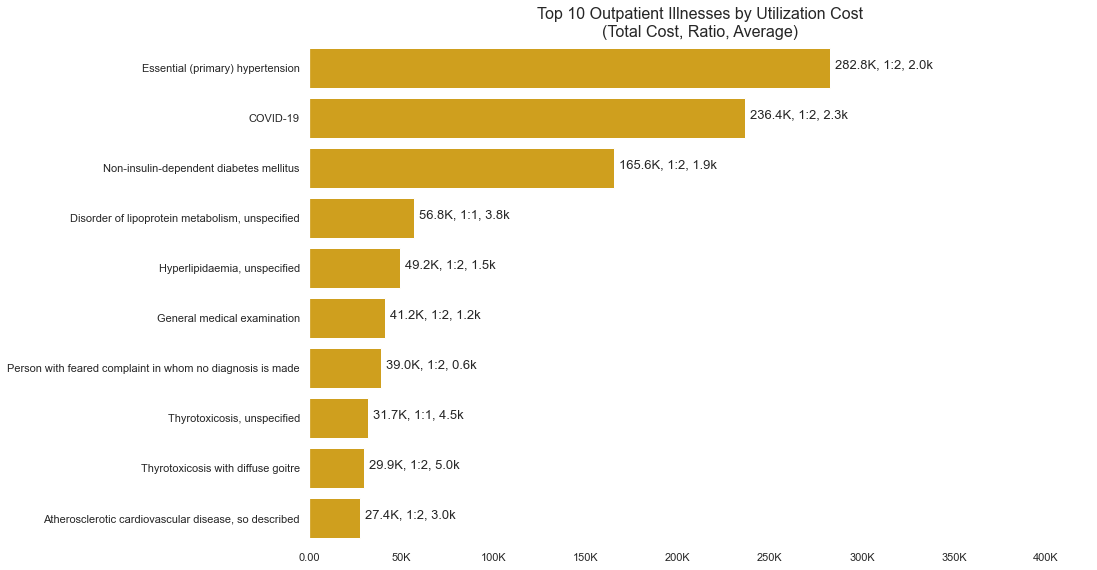

In [27]:
plot_top_n_illness(top_10_outpatient_illness, 10, 
                   '', '', 
                   'Top 10 Outpatient Illnesses by Utilization Cost\n(Total Cost, Ratio, Average)')

---
***The importance of analysing top medical conditions***

Analysing the top medical conditions covered by insurance is a vital step for medical insurance providers in managing costs effectively, whilst providing quality coverage to their clients. This analysis helps identify the most prevalent and expensive conditions, enabling providers to allocate resources efficiently and make informed decisions around preventive measures, such as health programmes, education campaign or health education initiatives. In addition to managing costs, analysing these conditions can also inform decisions around the design of insurance plans, ensuring they meet the evolving needs of clients and remain competitive in the marketplace.

By promoting healthy lifestyles and preventing future health issues, this analysis not only improves the quality of coverage but also contributes to overall better health outcomes for clients.

---

- For top utilised providers

In [28]:
def plot_top_n(df, n, x_label, y_label, chart_title=''):
    sns.set_style("whitegrid")
    sns.set(rc={"figure.figsize":(14,9)})
    ax = sns.barplot(x='CLAIM AMOUNT', y=y_label, data=df[:n], color='#003391')

    # Set the labels and title
    ax.set(xlabel='', ylabel='')
    ax.set_title(chart_title, fontsize=16)

    # Add annotations to the bars, formatted in thousands or millions
    max_value = df['CLAIM AMOUNT'].max() * 1.5  # add a 50% margin
    for p, r in zip(ax.patches, df.iterrows()):
        value = p.get_width()
        ratio = r[1]['Claims-to-Members Ratio']
        avg = r[1]['Average_Claim_Amount']
        if value >= 1_000_000:
            text = f'{value / 1_000_000:.1f}M, {ratio}, {avg / 1_000:.1f}k'
        elif value >= 1_000:
            text = f'{value / 1_000:.1f}K, {ratio}, {avg / 1_000:.1f}k'
        else:
            text = f'{value:.2f}, {ratio}, {avg:.2f}'
        ax.annotate(text, 
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(5, 0), 
                    textcoords='offset points',
                    fontsize=13)

    # Set the x-axis limit to accommodate the annotations
    ax.set_xlim(right=max_value)

    def format_tick_label(value, pos):
        if value >= 1_000_000:
            return f'{value / 1_000_000:.0f}M'
        elif value >= 1_000:
            return f'{value / 1_000:.0f}K'
        else:
            return f'{value:.2f}'

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_tick_label))

    ax.set_facecolor('white')

    plt.show()

In [29]:
# Filter data to payee type 'Network/Hospital'
network_inpatient_data = inpatient_data[inpatient_data['PAYEE TYPE'] != 'REIMBURSEMENT']

# Group by Provider Name and calculate total CLAIM AMOUNT, number of claims, and number of members
grouped_by_ip_provider = network_inpatient_data.groupby('PAYEE NAME').agg({'CLAIM AMOUNT': 'sum', 'CLAIM NO': 'nunique', 'Patient ID': 'nunique'})

# Change column headings
grouped_by_ip_provider.columns = ['CLAIM AMOUNT', 'Number of Claims', 'Number of Members']

# Add a new column for the claims-to-members ratio
grouped_by_ip_provider['Claims-to-Members Ratio'] = grouped_by_ip_provider.apply(
    lambda row: f"1:{math.ceil(row['Number of Claims'] / row['Number of Members'])}"
    if row['Number of Members'] > 0 or row['Number of Claims'] == 1 else "N/A", axis=1)

grouped_by_ip_provider = grouped_by_ip_provider.assign(Average_Claim_Amount = grouped_by_ip_provider['CLAIM AMOUNT'] / grouped_by_ip_provider['Number of Claims'])

# Sort by descending order of claim amount and select top 10 providers
top_10_ip_providers = grouped_by_ip_provider.sort_values('CLAIM AMOUNT', ascending=False).head(10)

# Reset the index and rename 'PAYEE NAME' to 'Provider Name'
top_10_ip_providers = top_10_ip_providers.reset_index().rename(columns={'PAYEE NAME': 'Provider Name'})

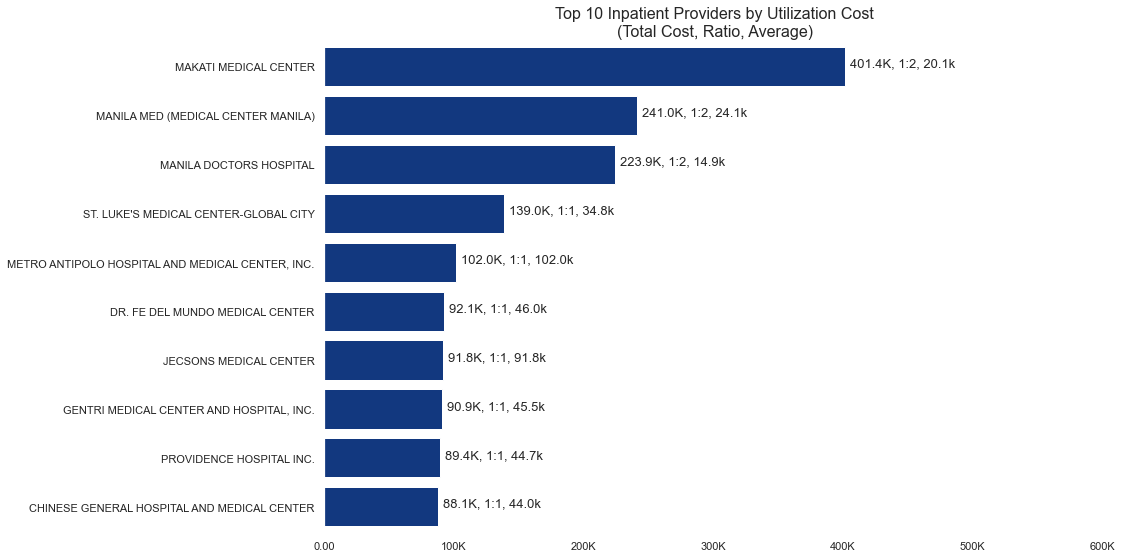

In [30]:
plot_top_n(top_10_ip_providers, 
           10, 'CLAIM AMOUNT', 
           'Provider Name', 
           'Top 10 Inpatient Providers by Utilization Cost\n(Total Cost, Ratio, Average)')

In [31]:
# Filter data to payee type 'Network/Hospital'
network_outpatient_data = outpatient_data[outpatient_data['PAYEE TYPE'] != 'REIMBURSEMENT']

# Group by Provider Name and calculate total CLAIM AMOUNT, number of claims, and number of members
grouped_by_op_provider = network_outpatient_data.groupby('PAYEE NAME').agg({'CLAIM AMOUNT': 'sum', 'CLAIM NO': 'nunique', 'Patient ID': 'nunique'})

# Change column headings
grouped_by_op_provider.columns = ['CLAIM AMOUNT', 'Number of Claims', 'Number of Members']

# Add a new column for the claims-to-members ratio
grouped_by_op_provider['Claims-to-Members Ratio'] = grouped_by_op_provider.apply(
    lambda row: f"1:{math.ceil(row['Number of Claims'] / row['Number of Members'])}"
    if row['Number of Members'] > 0 or row['Number of Claims'] == 1 else "N/A", axis=1)

grouped_by_op_provider = grouped_by_op_provider.assign(Average_Claim_Amount = grouped_by_op_provider['CLAIM AMOUNT'] / grouped_by_op_provider['Number of Claims'])

# Sort by descending order of claim amount and select top 10 providers
top_10_op_providers = grouped_by_op_provider.sort_values('CLAIM AMOUNT', ascending=False).head(10)

# Reset the index and rename 'PAYEE NAME' to 'Provider Name'
top_10_op_providers = top_10_op_providers.reset_index().rename(columns={'PAYEE NAME': 'Provider Name'})


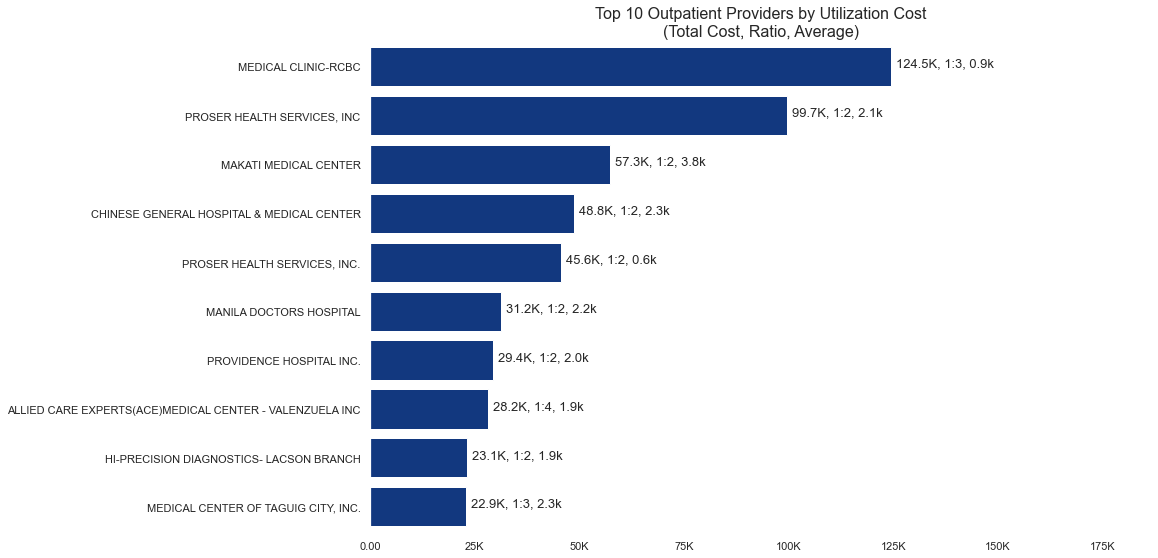

In [32]:
plot_top_n(top_10_op_providers, 
           10, 'CLAIM AMOUNT', 
           'Provider Name', 
           'Top 10 Outpatient Providers by Utilization Cost\n(Total Cost, Ratio, Average)')

---

***Why is analysing hospital and clinic utilisation important for medical insurance providers?***

By identifying which hospitals and clinics are most commonly utilised by patients, insurance providers can optimise their network design and negotiate better rates with providers, ultimately resulting in cost savings that can be passed on to clients. This analysis can also help identify potential gaps in care, allowing providers to target resources towards areas of need, and improve patient outcomes. Additionally, understanding hospital and clinic utilisation patterns can inform decisions around network expansion and contracting, ensuring that providers are meeting the evolving needs of their clients and offering high-quality, cost-effective care. By promoting the utilisation of high-performing hospitals and clinics, medical insurance providers can improve the overall quality of coverage for their clients and contribute to better health outcomes.

---

In [33]:
end_time = time.time()

total_time = end_time - start_time
print(f'Total time: {total_time:.2f} seconds')

Total time: 4.63 seconds


The program was able to generate a set of charts from the data in under 5 seconds.

---
Now that data has been  explored and visualised , the next step will be to translate this notebook into a program that can generate a dashboard on a web application with just a single click. Usually, this task takes 10-15 minutes to complete manually, depending on the data size. However, once this notebook is translated into a single executable program in Django, it will take less than 10 seconds to create a report with a dashboard, regardless of the file size.